# <center> MEAN OVERTURNING </center>

In [1]:
# Load Modules
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cmocean
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [2]:
# Find Path and Grid 
#tau = ['3','10','30','100','300','1000','3000','10000','Closed']
tau = ['3','Closed']
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ',
             'f) ', 'g) ', 'h) ', 'i) ']
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
check=0
runs=[]
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/Tav.nc'
    if not os.path.exists(flist):
        print ('WARNING: '+flist+
               ' does not exist!(skipping this tau...)')
        check += 0
    else:
        check += 1
        runs.append(i)   
Runs=np.array(runs)

Plot the wind driven mean overturning circulation

\begin{equation}
\bar{\psi}(y, z)=\iint \overline{v}\, \mathrm{d}x\, \mathrm{d}z,
\end{equation}

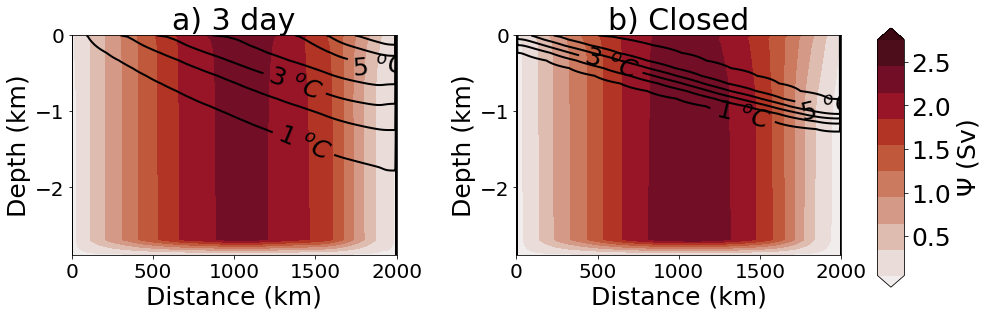

In [12]:
fig = plt.figure(figsize=(12.5, 4.5))
Psi_levs = np.arange(0.05, 2.8, .3)
Psi_ticks =np.arange(0, 3., .5)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    psi = c.get_psi_bar()/10**6
    Tavlat = c.mnc('Tav.nc','THETA').mean(axis=2)
    y = c.yc/1000
    yp = c.yg/1000
    ax = fig.add_subplot(1, 2, i+1)
    p = ax.contourf(yp, c.zc/1000, psi, Psi_levs,
                    cmap=cmocean.cm.amp,extend='both')
    Q2_levs = (np.arange(-1, 8, 1))
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    if str(tau[Runs[i]]) == 'Closed':
        tRef = [7.95797596, 7.81253554, 7.50931741, 6.93595077, 6.23538398,
                5.60148493, 5.02790935, 4.5089167 , 4.03931274, 3.6143975 ,
                3.22991829, 2.88202712, 2.56724216, 2.28241296, 2.02468884,
                1.79149041, 1.58048375, 1.38955702, 1.21679938, 1.0604818 ,
                0.9190398 , 0.79105779, 0.67525488, 0.57047207, 0.47566066,
                0.38987176, 0.31224674, 0.24200873, 0.14898305, 0.04478574]
        Tavlat = np.apply_along_axis(np.divide, 0, Tavlat, 4-np.sum(tRef*c.dzf)/-c.zc[-1])
    q = ax.contour(y, c.zc/1000,
                   Tavlat, Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$ (Sv)', fontsize=25)
cbar.ax.tick_params(labelsize=25)
